<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/73_top_nuclear_power_capacity_by_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
# https://www.visualcapitalist.com/sp/ranked-nuclear-power-capacity-by-country/
data = {
    'United States of America': 102, 'France': 64, 'China': 58,
    'Russia': 29, 'South Korea': 27, 'Canada': 15, 'Ukraine': 14,
    'India': 8, 'United Kingdom': 7,
}

colors = {
    'United States of America': '#9ed8c2', 'France': '#bee8ff', 'China': '#83cc60',
    'Russia': '#9ebcd8', 'South Korea': '#cccd65', 'Canada': '#e8befe', 'Ukraine': 'yellow',
    'India': '#fed0b9', 'United Kingdom': '#c9fcb0',
}

world_map = 'https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip'

In [ ]:
dataset = (
    gpd.read_file(world_map)
    .query('GEOUNIT != "Antarctica"')
    .to_crs('EPSG:3857')
    .assign(nuc_pow_cap=lambda df: df.GEOUNIT.map(data),
            colors=lambda df: df.GEOUNIT.map(colors))
)

dataset_with_vals = dataset.query('not colors.isna()')
dataset_without_vals = dataset.query('colors.isna()')

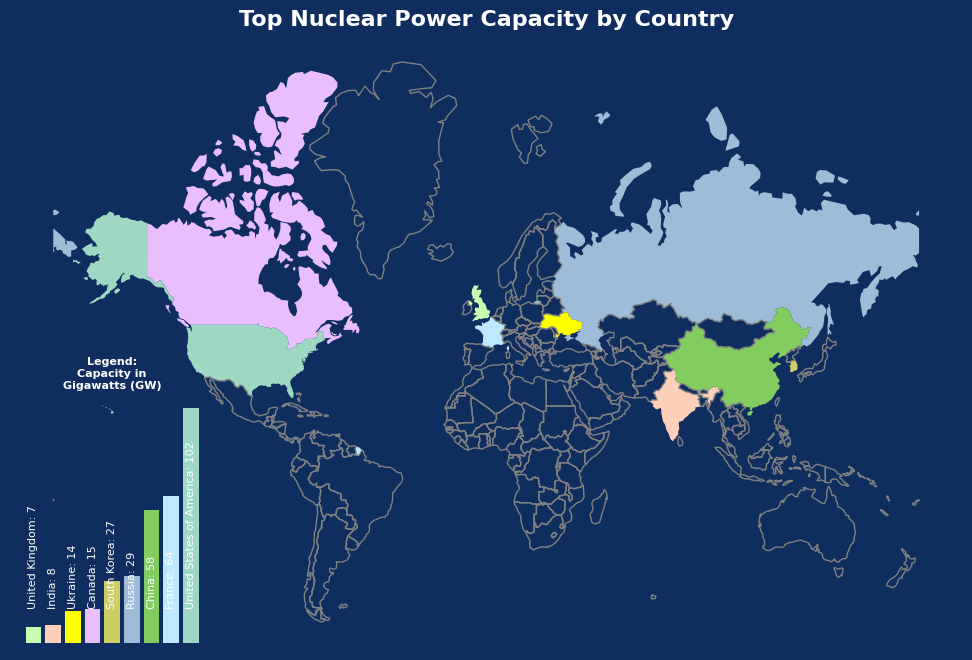

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Map
dataset_with_vals.plot(color=dataset_with_vals.colors, ax=ax)
dataset_without_vals.plot(ax=ax, facecolor='none', edgecolor='grey')
ax.set_title('Top Nuclear Power Capacity by Country', color='white', fontweight='bold', fontsize=16)
fig.patch.set_facecolor('#0F2D5E')
plt.axis('off')

# Bar Graph
ax_inset = inset_axes(ax, width='20%', height='40%', loc='lower left')
bars = ax_inset.bar(data.keys(), data.values(), color=colors.values())
ax_inset.set_title('Legend:\nCapacity in\nGigawatts (GW)', color='white', fontweight='bold', fontsize=8)
ax_inset.tick_params(labelleft=False, labelbottom=False)
ax_inset.tick_params(left=False, bottom=False)
ax_inset.patch.set_alpha(0)
ax_inset.invert_xaxis()
for spine in ('top', 'right', 'left', 'bottom'):
    ax_inset.spines[spine].set_visible(False)
for bar, category, value in zip(bars, data.keys(), data.values()):
    height = bar.get_height()
    ax_inset.text(
        bar.get_x() + bar.get_width() / 2, 15,
        f'{category}: {value}', rotation=90, color='white',
        fontsize=8, ha='center', va='bottom',
    )

plt.savefig('NuclearPowerCapacity.png', dpi=600, bbox_inches='tight');